In [1]:
import pandas as pd
import numpy as np

import os
import sys
import contextlib
from PIL import Image
from tqdm import tqdm
img_dir = "C:/Users/bmsha/sc2025/FungiImages/"
data_file = r"C:\Users\bmsha\sc2025\metadata_1\metadata.csv"
df = pd.read_csv(data_file)

In [10]:
#check the unique values in each coulmn 
for col in df.columns:
    if col in ['Habitat','Substrate']:
        print(f"Column: {col}")
        unique_values = df[col].unique()
        #print the unique values as a list separated by commas
        print(unique_values.tolist())
        print(f"Number of unique values: {len(unique_values)}\n")

Column: Habitat
['Mixed woodland (with coniferous and deciduous trees)', 'Unmanaged deciduous woodland', 'Forest bog', 'coniferous woodland/plantation', 'Deciduous woodland', 'natural grassland', 'lawn', 'Unmanaged coniferous woodland', 'garden', 'wooded meadow, grazing forest', 'dune', 'Willow scrubland', 'heath', 'Acidic oak woodland', 'roadside', 'Thorny scrubland', 'park/churchyard', 'Bog woodland', 'hedgerow', 'gravel or clay pit', 'salt meadow', 'bog', 'meadow', 'improved grassland', nan, 'other habitat', 'roof', 'fallow field', 'ditch', 'fertilized field in rotation']
Number of unique values: 30

Column: Substrate
['soil', 'leaf or needle litter', 'wood chips or mulch', 'dead wood (including bark)', 'bark', 'wood', 'bark of living trees', 'mosses', 'wood and roots of living trees', 'stems of herbs, grass etc', 'peat mosses', nan, 'dead stems of herbs, grass etc', 'fungi', 'other substrate', 'living stems of herbs, grass etc', 'living leaves', 'fire spot', 'faeces', 'cones', 'fru

In [28]:
class tokenize_attributes():
    """
    Tokenize attributes based on their type.
    """
    def __init__(self):
        self.habitat_types = ['Mixed woodland (with coniferous and deciduous trees)', 'Unmanaged deciduous woodland',
                              'Forest bog', 'coniferous woodland/plantation', 'Deciduous woodland', 'natural grassland', 'lawn',
                              'Unmanaged coniferous woodland', 'garden', 'wooded meadow, grazing forest', 'dune', 'Willow scrubland', 'heath',
                              'Acidic oak woodland', 'roadside', 'Thorny scrubland', 'park/churchyard', 'Bog woodland', 'hedgerow', 'gravel or clay pit',
                              'salt meadow', 'bog', 'meadow', 'improved grassland', 'other habitat', 'roof', 'fallow field', 'ditch', 'fertilized field in rotation']
        
        self.substrate_types = ['soil', 'leaf or needle litter', 'wood chips or mulch', 'dead wood (including bark)', 'bark',
                                'wood', 'bark of living trees', 'mosses', 'wood and roots of living trees', 'stems of herbs, grass etc',
                                'peat mosses','dead stems of herbs, grass etc', 'fungi', 'other substrate', 'living stems of herbs, grass etc',
                                'living leaves', 'fire spot', 'faeces', 'cones', 'fruits']
        
        self.habitat_types2idx = {habitat: idx+1 for idx, habitat in enumerate(self.habitat_types)}
        self.substrate_types2idx = {substrate: idx+1 for idx, substrate in enumerate(self.substrate_types)}
        
        
    
    def tokenize(self, attribute, attribute_type):
        if attribute_type == 'Habitat':
            if attribute not in self.habitat_types:
                return len(self.habitat_types)+1  # Return index for 'other habitat'
            else:
                return self.habitat_types2idx[attribute]
        if attribute_type == 'Substrate':
            if attribute not in self.substrate_types:
                return len(self.substrate_types)+1
            else:
                return self.substrate_types2idx[attribute]
        if attribute_type == 'eventDate':
            try:
                # Expecting 'yyyy-mm-dd' format
                month = int(attribute.split('-')[1])
                return month
            except (IndexError, ValueError, AttributeError):
                return 13  # or a default month token, e.g., 0
            

In [32]:
tt = tokenize_attributes()

print(tt.tokenize('fertilized field in rotation', 'Habitat'))
print(tt.tokenize(-1, 'eventDate'))

29
13


In [3]:
data_file = str('C:/Users/bmsha/sc2025/metadata_1/metadata.csv')
df = pd.read_csv(data_file)
train_df = df[df['filename_index'].str.startswith('fungi_train')]

In [4]:
train_df.head()

,filename_index,Habitat,Latitude,Longitude,Substrate,eventDate,taxonID_index
10152,fungi_train000000.jpg,NaN,NaN,NaN,NaN,NaN,66.0
10153,fungi_train000001.jpg,NaN,NaN,NaN,NaN,NaN,174.0
10154,fungi_train000002.jpg,NaN,NaN,NaN,NaN,NaN,50.0
10155,fungi_train000003.jpg,NaN,NaN,NaN,NaN,NaN,72.0
10156,fungi_train000004.jpg,NaN,NaN,NaN,NaN,NaN,30.0


In [2]:
img = r"C:\Users\bmsha\sc2025\FungiImages\fungi_train006537.jpg"
img = r"C:\Users\bmsha\sc2025\FungiImages\fungi_final000003.jpg"
#load img and all the metadata contained in the image telling the camera settings, etc.

from PIL import Image
from PIL.ExifTags import TAGS, GPSTAGS


@contextlib.contextmanager
def suppress_stdout():
    """Temporarily suppress stdout prints."""
    with open(os.devnull, "w") as devnull:
        old_stdout = sys.stdout
        sys.stdout = devnull
        try:
            yield
        finally:
            sys.stdout = old_stdout
            
def get_exif_data(image):
    """Extract EXIF data from an image."""
    exif_data = {}
    try:
        image = Image.open(image)
        info = image._getexif()
        if info is not None:
            for tag, value in info.items():
                tag_name = TAGS.get(tag, tag)
                exif_data[tag_name] = value
    except Exception as e:
        print(f"Error reading EXIF data: {e}")
    return exif_data
exif_data = get_exif_data(img)
print(exif_data)

{'RelatedImageWidth': 2816, 'RelatedImageLength': 2112, 'ResolutionUnit': 2, 'ExifOffset': 280, 'ImageDescription': '                               ', 'Make': 'Canon', 'Model': 'Canon IXUS 117 HS', 'Software': 'Paint.NET v3.5.11', 'DateTime': '2013:11:06 12:42:52', 'YCbCrPositioning': 2, 'SensitivityType': 4, 'XResolution': 180.0, 'YResolution': 180.0, 'ExifVersion': b'0230', 'ComponentsConfiguration': b'\x01\x02\x03\x00', 'CompressedBitsPerPixel': 3.0, 'DateTimeOriginal': '2013:11:06 12:42:52', 'DateTimeDigitized': '2013:11:06 12:42:52', 'ShutterSpeedValue': 5.90625, 'ApertureValue': 2.96875, 'ExposureBiasValue': -1.6666666666666667, 'MaxApertureValue': 2.96875, 'MeteringMode': 5, 'Flash': 16, 'FocalLength': 5.0, 'UserComment': b'\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x0

In [6]:
models = []
makers = []
data_times = []
DateTimeOriginal = []
for index, row in tqdm(df.iterrows(), total=len(df), desc="Processing images"):
    img_path = os.path.join(img_dir, row['filename_index'])
    with suppress_stdout():  # Now works
        exif_data = get_exif_data(img_path)
    if "Model" in exif_data:
        model = exif_data["Model"]
        model = model.replace('\x00', '')  # Clean up null characters
        model = model.strip()
    else:
        model = "Unknown Model"
    if "Make" in exif_data:
        maker = exif_data["Make"]
        maker = maker.replace('\x00', '')
        maker = maker.strip()
    else:
        maker = "Unknown Maker"
    if 'DateTime' in exif_data:
        date_time = exif_data['DateTime']
        date_time = date_time.replace('\x00', '')
        date_time = date_time.strip()
        
    if 'DateTimeOriginal' in exif_data:
        date_timeO = exif_data['DateTimeOriginal']
        date_timeO = date_timeO.replace('\x00', '')
        date_timeO = date_timeO.strip()
    else:
        date_time = "Unknown DateTime"
        
    models.append(model)
    makers.append(maker)
    data_times.append(date_time)
    DateTimeOriginal.append(date_timeO)

unique_models = set(models)
unqiue_makers = set(makers)
print("Number of unique camera models:", len(unique_models))
print("Number of unique camera makers:", len(unqiue_makers))
print(f"Unique camera models: {unique_models}")
print(f"Unique camera makers: {unqiue_makers}")

df['camera_model'] = models
df['camera_maker'] = makers
df['DataTime'] = data_times
df['DateTimeOriginal'] = DateTimeOriginal
#save the updated dataframe to a new csv file
output_file = r"C:\Users\bmsha\sc2025\metadata_1\metadata_with_camera_info.csv"
df.to_csv(output_file, index=False)

Processing images: 100%|██████████| 36015/36015 [08:51<00:00, 67.75it/s] 


Number of unique camera models: 417
Number of unique camera makers: 44
Unique camera models: {'', 'COOLPIX W100', 'SM-A715F', 'DC-G90', 'X-S1', 'iPhone X', 'DMC-ZS7', 'SM-G981B', 'PENTAX *ist DL', 'SM-G920F', 'Nexus 5X', 'ONEPLUS A3003', 'ILCE-7SM2', 'NIKON D5100', 'Canon EOS 350D DIGITAL', 'hp photosmart 735', 'Canon EOS-1D Mark IV', 'Canon PowerShot A1100 IS', 'ATU-L21', 'iPhone SE (1st generation)', 'DMC-TZ57', 'ONEPLUS A5010', 'COOLPIX S10', 'DSC-HX90V', 'DMC-GH2', 'DMC-FZ50', 'D6603', 'iPhone 6s Plus', 'PENTAX Optio WP', 'X-2,C-50Z', 'IR-300', 'COOLPIX P80', 'ILCE-7RM4', 'TG-4', 'GM1913', 'Canon EOS 70D', 'DC-9900', 'Canon PowerShot A3300 IS', 'Canon DIGITAL IXUS 75', 'FinePix F200EXR', 'iPhone 4', 'HTC Touch Pro2 T7373', 'Canon PowerShot A590 IS', 'Canon IXUS 285 HS', 'NIKON D60', 'DC-G9', 'HTC Wildfire', 'Nikon COOLSCAN IV ED', 'iPad mini 4', 'Canon IXUS 115 HS', 'Canon DIGITAL IXUS 55', 'E3200', 'NIKON D5600', 'PENTAX Optio W90', 'Canon DIGITAL IXUS 70', 'TA-1032', 'SM-A202F', 

In [7]:
#update the dataframe with the camera model and maker
df['camera_model'] = models
df['camera_maker'] = makers
df['DataTime'] = data_times
#save the updated dataframe to a new csv file
output_file = r"C:\Users\bmsha\sc2025\metadata_1\metadata_with_camera_info.csv"
df.to_csv(output_file, index=False)

In [47]:
unique_models_list = list(unique_models)
unique_models_list

['Canon PowerShot S3 IS',
 'DMC-FZ300',
 'PENTAX Optio W30',
 'D6603',
 'NX11',
 'Canon PowerShot S120',
 'CLT-L29',
 'NIKON D5300',
 'DSLR-A550',
 'GT-I9505',
 'Canon PowerShot A3300 IS',
 'Canon PowerShot G1 X',
 'u850SW,S850SW',
 'F3211',
 'iPad mini 2',
 'NIKON D5100',
 'Canon EOS 1200D',
 'FinePix S200EXR',
 'ATU-L21',
 'Canon DIGITAL IXUS 60',
 'SM-A505FN',
 'iPhone 12 Pro',
 'Canon DIGITAL IXUS 40',
 'Canon PowerShot A570 IS',
 'SM-A415F',
 'Canon PowerShot SX200 IS',
 'DMC-G6',
 'Canon DIGITAL IXUS',
 'Canon PowerShot A1100 IS',
 'Canon DIGITAL IXUS 970 IS',
 'V-LUX (Typ 114)',
 'DSC-H5',
 'DiMAGE Z5',
 'NIKON D7100',
 'E-400',
 'ILCE-6500',
 'iPhone 11',
 'SM-A605FN',
 'DSC-HX5V',
 'FE270,X815,C510',
 'Canon EOS 40D',
 'TG-5',
 'uTough-8010',
 'SM-A217F',
 'iPhone 6s Plus',
 'SM-G800F',
 'RNE-L21',
 'Canon DIGITAL IXUS 75',
 'SM-G960F',
 'NIKON D3200',
 'DSC-HX1',
 'Canon PowerShot A3150 IS',
 'Nokia 6.1',
 'SLT-A37',
 'MAR-LX1A',
 '8.3.2',
 'Lenovo K10a40',
 'SLT-A77V',
 'X-T

In [9]:
test_dict_list = []
test_df = df[df['filename_index'].str.startswith('fungi_test')]
for index, row in tqdm(test_df.iterrows(), total=len(test_df), desc="Processing images"):
    img_path = os.path.join(img_dir, row['filename_index'])
    with suppress_stdout():  # Now works
        exif_data = get_exif_data(img_path)
    if "Model" in exif_data:
        model = exif_data["Model"]
        model = model.replace('\x00', '')  # Clean up null characters
        model = model.strip()
    else:
        model = "Unknown Model"
    if "Make" in exif_data:
        maker = exif_data["Make"]
        maker = maker.replace('\x00', '')
        maker = maker.strip()
    else:
        maker = "Unknown Maker"
    test_dict_list.append({
        'Model': model,
        'Make': maker,
        'Latitude': row['Latitude'],
        'Longitude': row['Longitude']
    })

# plot the latitude and longitude of the test images, colored by the camera model
import matplotlib.pyplot as plt

Processing images: 100%|██████████| 6552/6552 [00:04<00:00, 1383.01it/s]


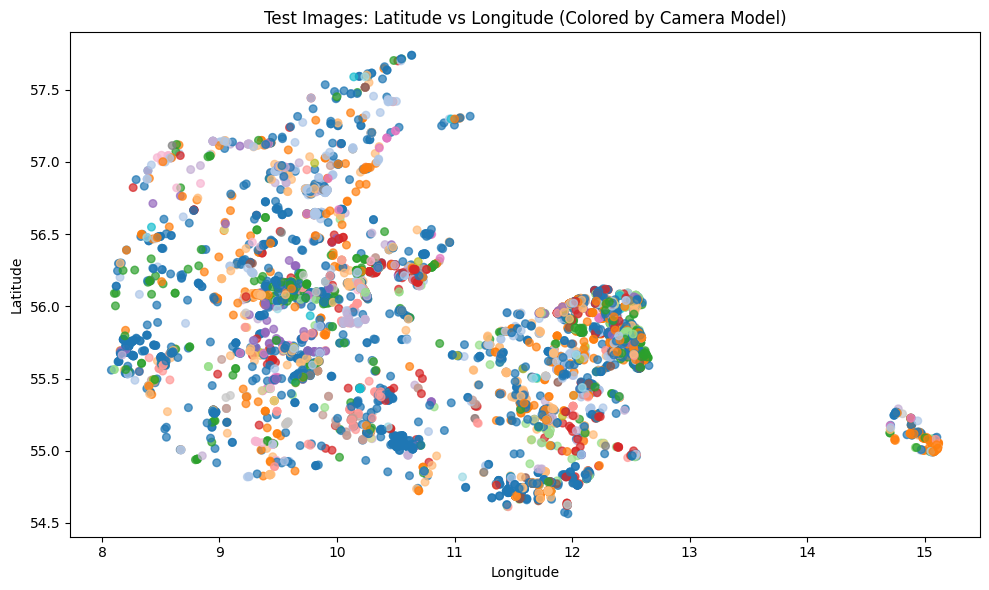

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Convert to DataFrame
test_plot_df = pd.DataFrame(test_dict_list)

# Factorize 'Model' to get a numeric code for each camera model
model_codes, _ = pd.factorize(test_plot_df['Model'])

# Plot without legend
plt.figure(figsize=(10, 6))
plt.scatter(
    test_plot_df['Longitude'],
    test_plot_df['Latitude'],
    c=model_codes,
    cmap='tab20',  # A large categorical palette
    alpha=0.7,
    s=30
)

plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Test Images: Latitude vs Longitude (Colored by Camera Model)")
plt.tight_layout()
plt.show()

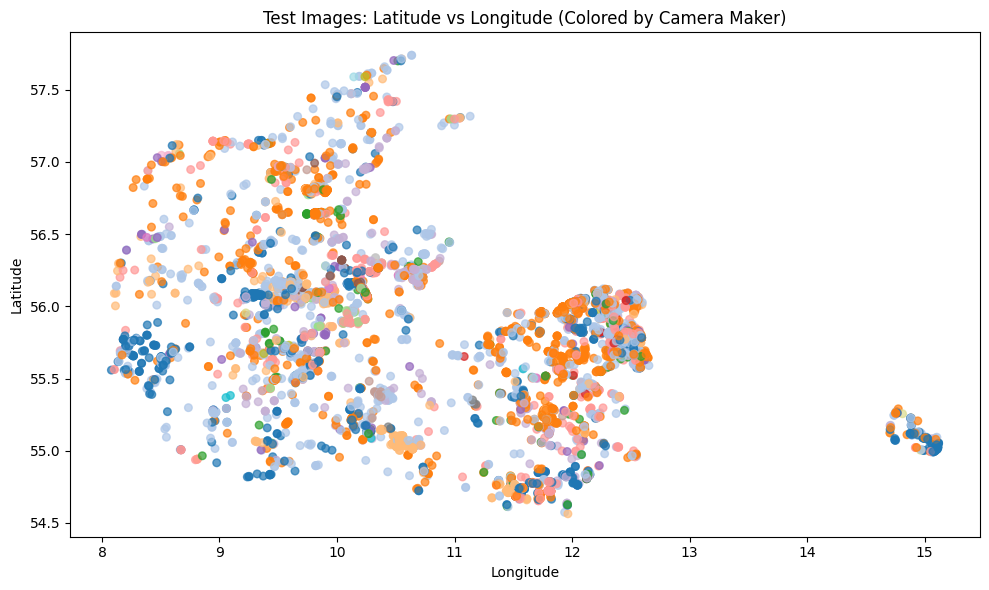

In [11]:
import matplotlib.pyplot as plt
import pandas as pd

# Convert to DataFrame
test_plot_df = pd.DataFrame(test_dict_list)

# Factorize 'Model' to get a numeric code for each camera model
model_codes, _ = pd.factorize(test_plot_df['Make'])

# Plot without legend
plt.figure(figsize=(10, 6))
plt.scatter(
    test_plot_df['Longitude'],
    test_plot_df['Latitude'],
    c=model_codes,
    cmap='tab20',  # A large categorical palette
    alpha=0.7,
    s=30
)

plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Test Images: Latitude vs Longitude (Colored by Camera Maker)")
plt.tight_layout()
plt.show()

In [3]:
import pandas as pd
csv_file = r"C:\Users\bmsha\sc2025\metadata_1\metadata_fused.csv"
#load it 
df_fused = pd.read_csv(csv_file)

#find max/min of Latitude and Longitude
max_latitude = df_fused['Latitude'].max()
min_latitude = df_fused['Latitude'].min()
max_longitude = df_fused['Longitude'].max()
min_longitude = df_fused['Longitude'].min()
print(f"Max Latitude: {max_latitude}, Min Latitude: {min_latitude}")
print(f"Max Longitude: {max_longitude}, Min Longitude: {min_longitude}")

Max Latitude: 57.739133, Min Latitude: 54.56094
Max Longitude: 15.14406, Min Longitude: 8.08042
